# 词向量的可视化探索

```bash
pip install 'whatlies[all]'
```

文档地址 https://rasahq.github.io/whatlies/

# `whatlies` demo

We're going to understand "what lies" in word embeddings.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from whatlies import Embedding, EmbeddingSet
import matplotlib.pylab as plt

In [3]:
man   = Embedding("man", [0.5, 0.1])
woman = Embedding("woman", [0.5, 0.6])
king  = Embedding("king", [0.7, 0.33])
queen = Embedding("queen", [0.7, 0.9])

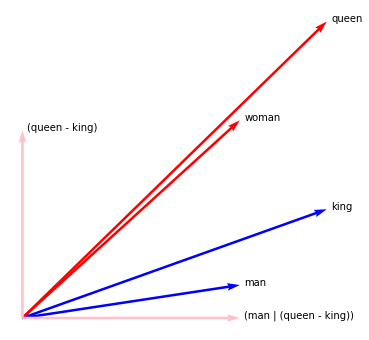

In [4]:
plt.figure(figsize=(6, 6))

man.plot(kind="arrow", color="blue")
woman.plot(kind="arrow", color="red")
king.plot(kind="arrow", color="blue")
queen.plot(kind="arrow", color="red")

(queen - king).plot(kind="arrow", color="pink", show_ops=True)
(man | (queen - king)).plot(kind="arrow", color="pink", show_ops=True)

plt.axis('off');

# Plotting High Dimensions

Note that you need to install the spaCy language model before you can run this. 

```
python -m spacy install en_core_web_md
```

In [5]:
import spacy 
nlp = spacy.load('en_core_web_md')

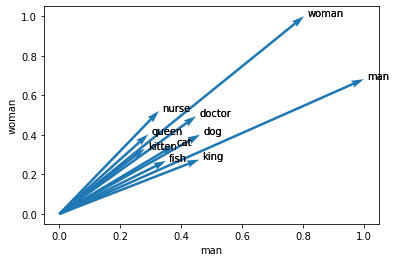

In [6]:
words = ["cat", "dog", "fish", "kitten", "man", "woman", "king", "queen", "doctor", "nurse"]
tokens = {t.text: Embedding(t.text, t.vector) for t in nlp.pipe(words)}

x_axis = tokens['man']
y_axis = tokens['woman']

for name, t in tokens.items():
    t.plot(x_axis=x_axis, y_axis=y_axis).plot(kind="text", x_axis=x_axis, y_axis=y_axis)